In [36]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [37]:
train_data = pd.read_csv('C://Users/user/Desktop/Predictive Modelling/Week 2/Restaurant/train.csv/train.csv')
train_X = train_data.iloc[:, 5:-1].values
train_y = train_data.iloc[:, -1].values
test_data = pd.read_csv('C://Users/user/Desktop/Predictive Modelling/Week 2/Restaurant/test.csv/test.csv')
test_X = test_data.iloc[:, 5:].values
#test_y = test_data.iloc[:, -1].values
train_X[0]

array([4., 5., 4., 4., 2., 2., 5., 4., 5., 5., 3., 5., 5., 1., 2., 2., 2.,
       4., 5., 4., 1., 3., 3., 1., 1., 1., 4., 2., 3., 5., 3., 4., 5., 5.,
       4., 3., 4.])

In [38]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#train_X = np.array(ct1.fit_transform(train_X))

#ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#test_X = np.array(ct2.fit_transform(test_X))

#train_X[0]

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(train_X,train_y)
pred =regressor.predict(test_X)
print(pred)

[4758476. 4651866. 4758476. ... 4155435. 4952255. 9652350.]


# Simple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X,train_y)
p = regressor.predict(test_X)
print(p)

[5760599.07 3815315.2  2255464.39 ... 6082521.75 3544592.81 6775983.8 ]


# Multiple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X,train_y)
y_pred = regressor.predict(test_X)
print(y_pred)

[5760599.07 3815315.2  2255464.39 ... 6082521.75 3544592.81 6775983.8 ]


# Polynomial Regression model

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(train_X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, train_y)
y_result=regressor.predict(test_X)
print(y_result)

[5760599.07 3815315.2  2255464.39 ... 6082521.75 3544592.81 6775983.8 ]


# Random Forest model

In [43]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor()
rand_reg.fit(train_X,train_y)
rand_pred = rand_reg.predict(test_X)
print(rand_pred)

[4259596.13 3377687.91 4266789.   ... 4370928.77 4541279.97 5899201.11]


In [44]:
importances = list(rand_reg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_data.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: P24                  Importance: 0.17
Variable: P23                  Importance: 0.09
Variable: Open Date            Importance: 0.06
Variable: P1                   Importance: 0.06
Variable: P15                  Importance: 0.06
Variable: P14                  Importance: 0.05
Variable: P18                  Importance: 0.05
Variable: Id                   Importance: 0.04
Variable: P6                   Importance: 0.04
Variable: P12                  Importance: 0.04
Variable: P17                  Importance: 0.04
Variable: Type                 Importance: 0.03
Variable: P7                   Importance: 0.03
Variable: P16                  Importance: 0.03
Variable: City                 Importance: 0.02
Variable: City Group           Importance: 0.02
Variable: P3                   Importance: 0.02
Variable: P5                   Importance: 0.02
Variable: P8                   Importance: 0.02
Variable: P20                  Importance: 0.02
Variable: P4                   Importanc

ValueError: The number of FixedLocator locations (37), usually from a call to set_ticks, does not match the number of ticklabels (43).

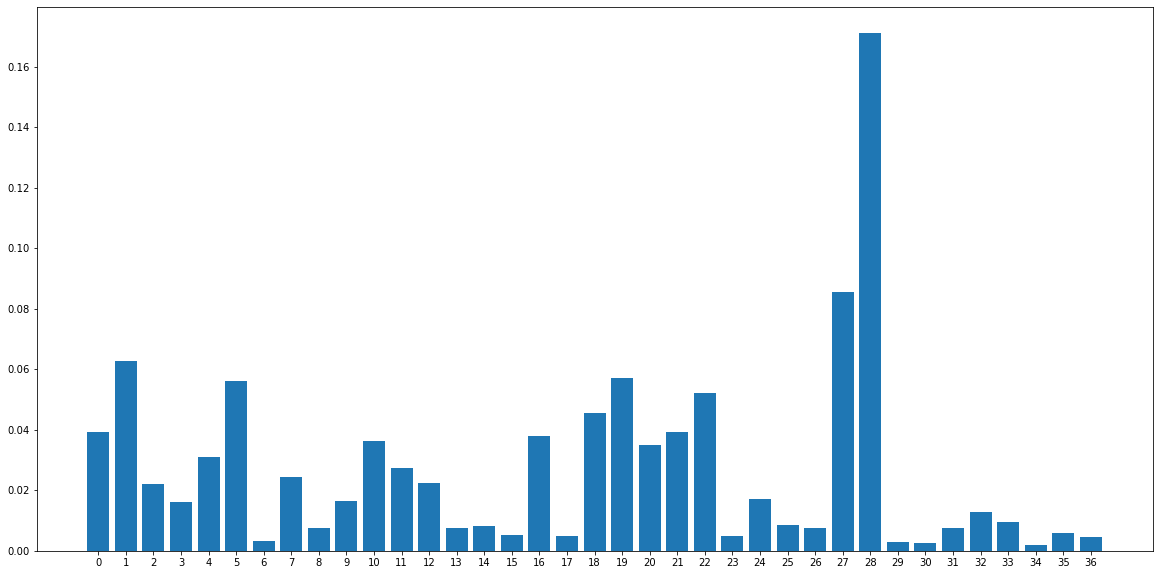

In [45]:
x_values = list(range(len(importances)))
plt.figure(figsize = (20,10))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, train_data.columns, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');